In [6]:
import numpy as np
import cv2
from matchPics import matchPics
from helper import plotMatches
import scipy
from matplotlib import pyplot as plt
import skimage.feature

In [7]:
# Q6
# Read the image and convert to grayscale, if necessary
cv_cover = cv2.imread('../data/cv_cover.jpg')


0
10


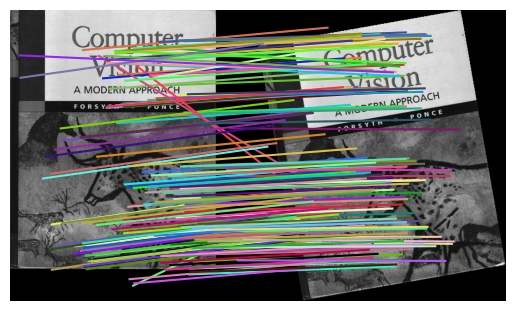

20
30
40
50
60
70


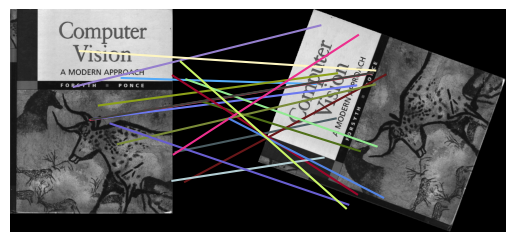

80
90
100
110
120
130
140
150
160
170
180
190


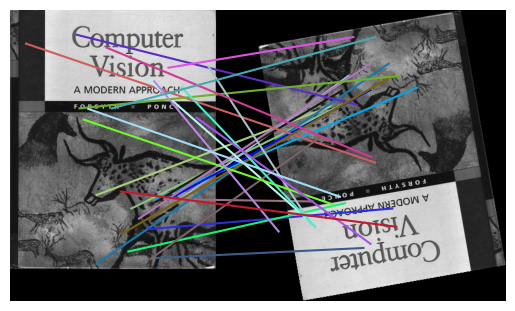

200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350


In [8]:
# Initialize histogram
histogram = []
iter = 0
# Match features for rotated images and update histogram
for i in range(0,360,10):
    # Rotate image
    print(i)
    rotated_cv_cover = scipy.ndimage.rotate(cv_cover, i)
    # Compute features, descriptors and match features
    matches, locs1, locs2 = matchPics(rotated_cv_cover, cv_cover)

    # Update histogram
    for r in range(len(matches)):
        histogram.append(i)
    
    # Display feature matching result for specific orientations
    if i == 10 or i == 70 or i == 190:
        plotMatches(cv_cover, rotated_cv_cover, matches, locs1, locs2)

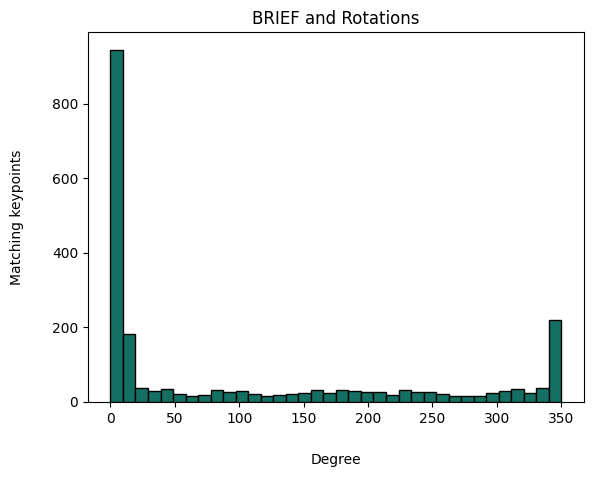

In [13]:
# Display histogram
plt.hist(histogram
         ,color = '#147062'
         ,edgecolor = 'black'
         ,linewidth = 1
         , bins=36)

plt.title('BRIEF and Rotations')
plt.xlabel('Degree', labelpad=10)
plt.ylabel('Matching keypoints', labelpad=10)
plt.show()